In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import math
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('dataset.csv')
# data= (data- data.mean())/data.std()
data= (data-data.min())/(data.max()-data.min())

print(data.shape)
# data.head()

(434874, 3)


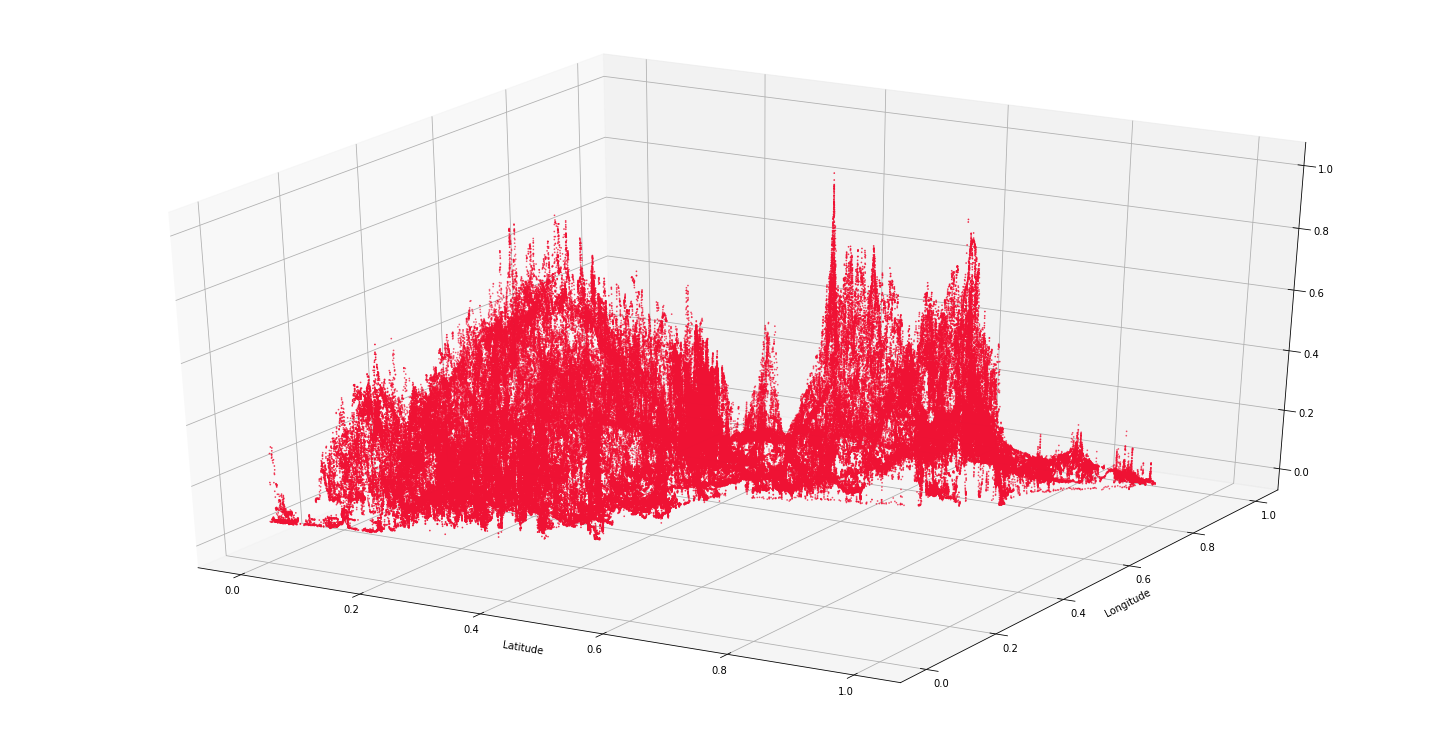

In [27]:
lat = data['Latitude'].values
lon = data['Longitude'].values
alt = data['Altitude'].values
# latm= np.mean(lat)



# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lat,lon, alt, color='#ef1234',s=0.5)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [28]:
l = len(lat)
# print(l)
x0 = np.ones(l)
X = np.array([x0, lat, lon]).T
# Initial Coefficients
B = np.array([0,0,0])
Y = np.array(alt)
Y_pred=np.zeros(len(alt))
Bnew=np.array([0,0,0])
alpha = 0.1

In [29]:
def cost_function(X, Y, B):
    m = len(Y)
#     print(m)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [30]:
inital_cost = cost_function(X, Y, B)
print("Initial Value of Error function is: ",inital_cost)

Initial Value of Error function is:  0.0316388680444757


In [31]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
#         print(1)
        
    return B, cost_history

Coefficients for gradient descent:  [ 0.20348837 -0.05331657  0.06546252]
Cost:  0.008291408541182684


Text(0.5, 1.0, 'LOSS VS ITERATIONS GRAPH FOR GRADIENT DESCENT')

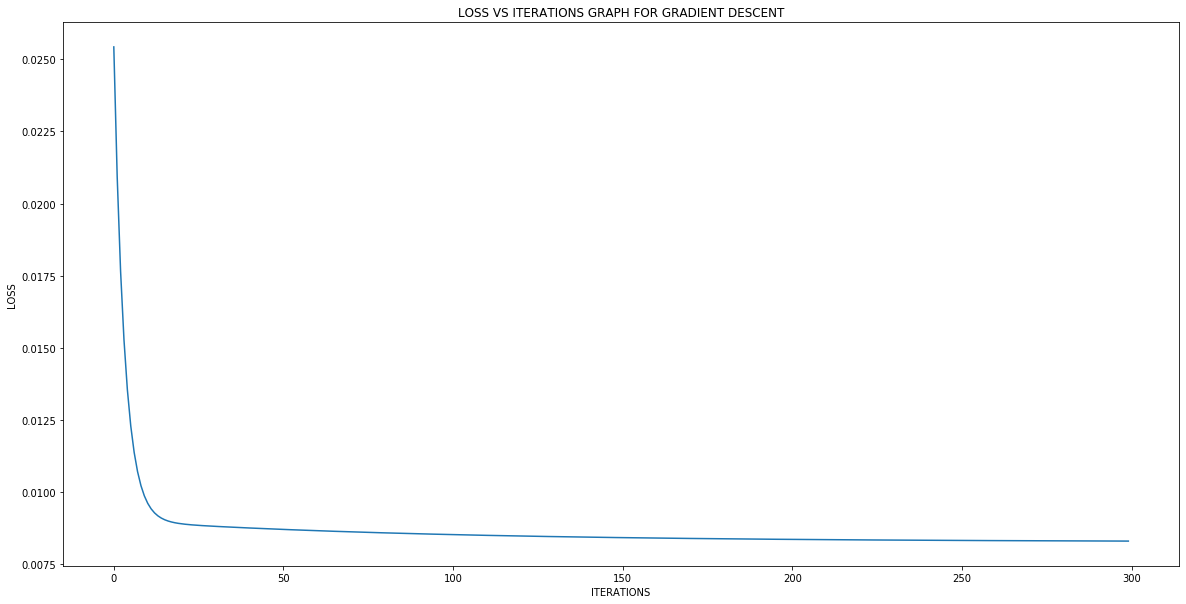

In [35]:
newB, cost_history = gradient_descent(X, Y, B,0.1,300)

plt.plot(cost_history)

# New Values of B
print("Coefficients for gradient descent: ",newB)

# Final Cost of new B
print("Cost: ",cost_history[-1])
# print(np.sqrt(cost_history[-1]*2))
plt.xlabel("ITERATIONS")
plt.ylabel("LOSS")
plt.title("LOSS VS ITERATIONS GRAPH FOR GRADIENT DESCENT")

In [36]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
#     print(mean_y)
    ss_tot = sum((Y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print("RMS ERROR: ",rmse(Y, Y_pred))
print("R squared value:",r2_score(Y, Y_pred))

RMS ERROR:  0.128774287349477
R squared value: 0.7379359928576632
